In [3]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Reading

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning & EDA

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Convert TotalCharges column into numbers

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [9]:
 pd.to_numeric(df.TotalCharges, errors='coerce')
# since errors='coerce' returns str as NaN

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
# locate NaN

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [12]:
df.shape

(7043, 20)

In [13]:
# create df1 from df without NaN in TotalCharges column
df1 = df[df['TotalCharges'] != ' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
 pd.to_numeric(df1.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [16]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

# Change 'No internet service' & 'No phone service' into 'No'

In [17]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


C:\Users\Quang Hung\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


# Divide InternetService, Contract,  PaymentMethod column into Yes/No columns

In [18]:
df1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
pd.options.mode.chained_assignment = None  # default='warn'

In [20]:
df1['InternetService_No'] = np.where(df1['InternetService'] == 'No', 'Yes', 'No')
df1['InternetService_DSL'] = np.where(df1['InternetService'] == 'DSL', 'Yes', 'No')
df1['InternetService_Fiber optic'] = np.where(df1['InternetService'] == 'Fiber optic', 'Yes', 'No')

df1['Contract_Month-to-month'] = np.where(df1['Contract'] == 'Month-to-month', 'Yes', 'No')
df1['Contract_One year'] = np.where(df1['Contract'] == 'One year', 'Yes', 'No')
df1['Contract_Two year'] = np.where(df1['Contract'] == 'Two year', 'Yes', 'No')

df1['PaymentMethod_Electronic check'] = np.where(df1['PaymentMethod'] == 'Electronic check', 'Yes', 'No')
df1['PaymentMethod_Mailed check'] = np.where(df1['PaymentMethod'] == 'Mailed check', 'Yes', 'No')
df1['PaymentMethod_Bank transfer (automatic)'] = np.where(df1['PaymentMethod'] == 'Bank transfer (automatic)', 'Yes', 'No')
df1['PaymentMethod_Credit card (automatic)'] = np.where(df1['PaymentMethod'] == 'Credit card (automatic)', 'Yes', 'No')

In [21]:
df2 = df1.drop(labels=['InternetService','Contract','PaymentMethod'], axis=1)
df2.shape

(7032, 27)

In [22]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']
InternetService_No : ['No' 'Yes']
InternetService_DSL : ['Yes' 'No']
InternetService_Fiber optic : ['No' 'Yes']
Contract_Month-to-month : ['Yes' 'No']
Contract_One year : ['No' 'Yes']
Contract_Two year : ['No' 'Yes']
PaymentMethod_Electronic check : ['Yes'

In [23]:
pd.to_numeric(df2.TotalCharges, errors='coerce')
df2.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7032, dtype: object

In [24]:
pd.set_option('display.max_columns', 30)
df2.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_No,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,Female,0,Yes,No,1,No,No,No,Yes,No,No,No,No,Yes,29.85,29.85,No,No,Yes,No,Yes,No,No,Yes,No,No,No
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.5,No,No,Yes,No,No,Yes,No,No,Yes,No,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No
3,Male,0,No,No,45,No,No,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,No,Yes,No,No,Yes,No,No,No,Yes,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No
5,Female,0,No,No,8,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.65,820.5,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No
6,Male,0,No,Yes,22,Yes,Yes,No,Yes,No,No,Yes,No,Yes,89.10,1949.4,No,No,No,Yes,Yes,No,No,No,No,No,Yes
7,Female,0,No,No,10,No,No,Yes,No,No,No,No,No,No,29.75,301.9,No,No,Yes,No,Yes,No,No,No,Yes,No,No
8,Female,0,Yes,No,28,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No
9,Male,0,No,Yes,62,Yes,No,Yes,Yes,No,No,No,No,No,56.15,3487.95,No,No,Yes,No,No,Yes,No,No,No,Yes,No


In [25]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']
InternetService_No : ['No' 'Yes']
InternetService_DSL : ['Yes' 'No']
InternetService_Fiber optic : ['No' 'Yes']
Contract_Month-to-month : ['Yes' 'No']
Contract_One year : ['No' 'Yes']
Contract_Two year : ['No' 'Yes']
PaymentMethod_Electronic check : ['Yes'

In [26]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'])

In [27]:
df2['gender'].replace({'Female':0 , 'Male':1}, inplace=True)

In [28]:
df2.replace({'No':0 , 'Yes':1}, inplace=True)

In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_No                           int64
InternetService_DSL                          int64
InternetService_Fiber optic    

# Scaling Tenure, MonthlyCharges, TotalCharges

In [30]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_No : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [32]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_No,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
1693,1,0,1,0,1.000000,1,1,1,1,1,1,1,1,0,0.957214,0.964257,0,0,0,1,0,0,1,0,0,0,1
1823,1,0,0,0,0.253521,1,0,0,1,0,0,0,0,1,0.553234,0.162209,1,0,0,1,1,0,0,0,0,0,1
2057,0,0,1,0,0.295775,1,1,1,0,0,1,1,1,1,0.606468,0.198933,1,0,1,0,1,0,0,1,0,0,0
2169,0,0,1,0,0.859155,1,0,1,0,1,1,1,1,0,0.624378,0.573171,0,0,1,0,0,0,1,0,1,0,0


In [33]:
df2.shape

(7032, 27)

# Split data into Train & Test data

In [34]:
X = df2.drop('Churn', axis='columns')
Y = df2['Churn']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=5)

In [36]:
X_train.shape

(5625, 26)

In [37]:
X_test.shape

(1407, 26)

In [38]:
Y_train.shape

(5625,)

In [39]:
Y_test.shape

(1407,)

# Build Artificial Neutral Network (ANN) model

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(20, input_shape=(26,), activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=150)

Epoch 1/150
176/176 [==============================] - 1s 2ms/step - loss: 0.5094 - accuracy: 0.7420
Epoch 2/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7936
Epoch 3/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8000
Epoch 4/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8020
Epoch 5/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8027
Epoch 6/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8034
Epoch 7/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8043
Epoch 8/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8066
Epoch 9/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8069
Epoch 10/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8229
Epoch 82/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8233
Epoch 83/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8240
Epoch 84/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8224
Epoch 85/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8242
Epoch 86/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8247
Epoch 87/150
176/176 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8235
Epoch 88/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8210
Epoch 89/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8252
Epoch 90/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 

# Evaluate results with Test data

In [42]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7811


[0.4590791165828705, 0.7810945510864258]

In [46]:
Y_predict = model.predict(X_test)
Y_predict[:10]

array([[0.5742823 ],
       [0.6145638 ],
       [0.02087429],
       [0.76592314],
       [0.59352463],
       [0.9025496 ],
       [0.21504778],
       [0.5246185 ],
       [0.3149793 ],
       [0.13565001]], dtype=float32)

# Create a list convert predicted results into 1 & 0

In [48]:
Y_pred = []
for result in Y_predict:
       if result > 0.5:
           Y_pred.append(1)
       else: 
           Y_pred.append(0)

In [50]:
Y_pred[:10]

[1, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [51]:
Y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

# Create a classification report

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       999
           1       0.62      0.64      0.63       408

    accuracy                           0.78      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.78      0.78      0.78      1407



(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

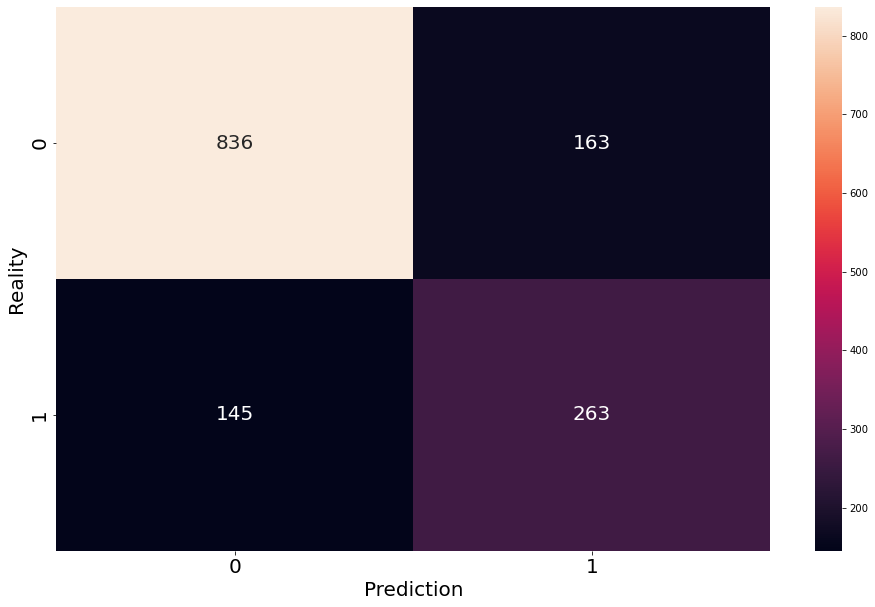

In [84]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred)

plt.figure(figsize= (16,10))
sns.heatmap(cm,annot=True, fmt='d', annot_kws={'fontsize':20})
plt.xlabel('Prediction', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Reality', fontsize=20)
plt.yticks(fontsize=20)

# Accuracy equals

In [69]:
round((263+836)/(263+836+145+163),2)

0.78

# Precision for 0 
i.e. Of the customers the model said would not churn, how many percent of the customers actually did not churn in reality?

In [70]:
round((836/(836+145)),2)

0.85

# Precision for 1
i.e. Of the customers the model said would churn, how many percent of the customers actually did churn in reality?

In [71]:
round((263/(263+163)),2)

0.62

# Recall for 0
i.e. Of the customers who did not churn in reality, how many percent of the customers did the model predict would not churn? 

In [73]:
round((836/(836+163)),2)

0.84

# Recall for 1
i.e. Of the customers who did churn in reality, how many percent of the customers did the model predict would churn? 

In [74]:
round((263/(263+145)),2)

0.64